# Ejercicio 4: Clasificación o regresión | Red Neuronal
---

## Cargar el Dataset
---
Cargar el dataset 'top500mangaMAL.csv' usando Pandas.

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Cargar el Dataset
data = pd.read_csv("top500mangaMAL.csv")

## Selección y Limpieza de Datos
---
Seleccionar las columnas relevantes y eliminar filas con valores nulos en 'Score'.

In [14]:
# Selección y Limpieza de Datos

# Usaremos las columnas relevantes: 'Genres', 'Popularity', 'Members', 'Favorites', y 'Score'
data = data[['Genres', 'Popularity', 'Members', 'Favorites', 'Score']]

# Eliminar filas con valores nulos en 'Score'
data = data.dropna(subset=['Score'])

## Procesar la Columna 'Genres'
---
Procesar la columna 'Genres' para extraer información relevante y convertir los géneros en variables dummies.

In [15]:
# Procesar la columna 'Genres' para extraer información relevante y convertir los géneros en variables dummies

# Procesar la columna 'Genres' para extraer información relevante
# Convertiremos los géneros en variables dummies
genres_data = data['Genres'].str.strip('[]').str.replace(' ', '').str.replace("'", "").str.split(',')

# Convertir el conjunto de géneros únicos a una lista
unique_genres = list(set(genre for genres in genres_data.dropna() for genre in genres))

# Crear columnas para cada género y asignar 1/0 si el manga pertenece a ese género
genres_encoded = pd.DataFrame(0, index=data.index, columns=unique_genres)
for i, genres in genres_data.dropna().items():
    # Asegurarse de que no haya duplicados en la lista de géneros
    unique_genre_list = list(set(genres))  # Convertir el conjunto a una lista
    genres_encoded.loc[i, unique_genre_list] = 1

# Combinar datos categóricos (géneros) con las características numéricas
numerical_data = data[['Popularity', 'Members', 'Favorites']].values
X = np.hstack((genres_encoded.values, numerical_data))

y = data['Score'].values  # Etiqueta a predecir


## Entrenamiento y prueba del dataset
---
Entrenar el modelo con el dataset de entrenamiento

In [16]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Creación del modelo de red neuronal
---
Se crea un modelo de red neuroral y se entrenará el modelo con los datos de entrenamiento.

In [17]:
# Crear el modelo de red neuronal
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida: {loss:.4f}, MAE: {mae:.4f}")

c:\Users\esoli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 56.3940 - mae: 7.4707 - val_loss: 36.2377 - val_mae: 5.9317
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 28.5866 - mae: 5.1594 - val_loss: 16.9387 - val_mae: 3.7929
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.6016 - mae: 3.1199 - val_loss: 7.2932 - val_mae: 2.4145
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 6.3579 - mae: 2.1514 - val_loss: 4.9669 - val_mae: 1.9093
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.3667 - mae: 1.7067 - val_loss: 3.7262 - val_mae: 1.6215
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 2.3000 - mae: 1.2366 - val_loss: 2.8052 - val_mae: 1.3799
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.5287 - mae: 1.0091 - val_loss: 2.1300 - val_mae: 1.1685
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9205 - mae: 0.7492 - val_loss: 1.6380 - val_mae: 0.9857
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss:

## Combinar Datos Categóricos y Numéricos y graficar los datos
---
Combinar los datos categóricos (géneros) con las características numéricas. Luego, graficar los datos.

   Popularity  Members  Favorites  Fantasy  Kids  Psychological  Shounen  \
0           4   296958      61992        1     0              1        0   
1          50    97073      18083        0     0              0        1   
2          11   197562      26386        0     0              0        1   
3           2   306944      75106        1     0              0        1   
4          39   103030      10000        0     0              1        0   

   Thriller  Cars  Military  ...  Parody  Romance  Gender  Comedy  Sci  \
0         0     0         1  ...       0        0       0       0    0   
1         0     0         0  ...       0        0       0       0    0   
2         0     0         1  ...       0        0       0       1    0   
3         0     0         0  ...       0        0       0       1    0   
4         0     0         0  ...       0        0       0       0    0   

   Mystery  Music  Adventure  Historical  Game  
0        0      0          1           0     0  


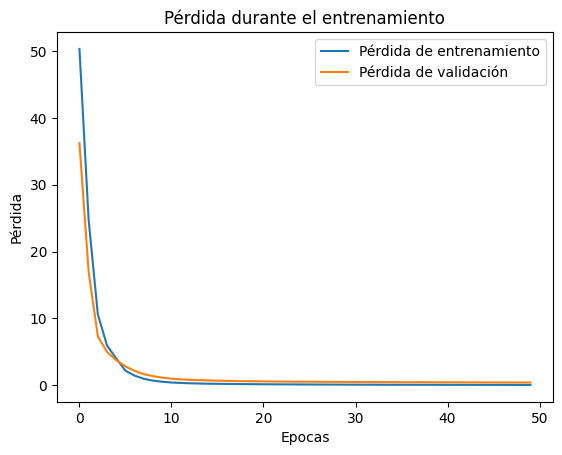

In [19]:
# Combinar Datos Categóricos y Numéricos

# Combinar datos categóricos (géneros) con las características numéricas
numerical_data = data[['Popularity', 'Members', 'Favorites']].values
combined_data = pd.concat([pd.DataFrame(numerical_data, columns=['Popularity', 'Members', 'Favorites']), genres_encoded], axis=1)

# Mostrar las primeras filas del DataFrame combinado
print(combined_data.head())

# Graficar el historial de entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
